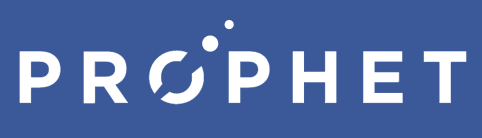

Segundo o artigo no Facebook Research, o Prophet foi desenvolvido com um pensamento de resolver negócios de alta qualidade, no paper há mais detalhes sobre o modelo. Essa biblioteca tenta solucionar as seguintes dificuldades comuns a muitas séries temporais de negócios:
 

*   Efeitos sazonais causados ​​pelo comportamento humano: ciclos semanais, mensais e anuais, quedas e picos nos feriados.

*   Mudanças na tendência devido a novos produtos e eventos de mercado.
Outliers.


*   Acessibilidade a um amplo público de analistas, possivelmente sem profundo conhecimento em séries temporais.

*   Aplicabilidade a uma ampla gama de problemas de previsão distintos.

*   Estimativa de desempenho automatizada de um grande número de previsões, incluindo sinalização de problemas em potencial para sua inspeção subsequente pelo analista.







Agora, vamos dar uma olhada em como o Prophet funciona. Em sua essência, esta biblioteca utiliza o modelo de regressão aditiva 𝑦(𝑡) compreendendo os seguintes componentes:

                                            𝑦(𝑡)=𝑔(𝑡)+𝑠(𝑡)+ℎ(𝑡)+ϵ𝑡

Onde: 

*   Tendência 𝑔(𝑡) modela mudanças não periódicas.
*   Sazonalidade 𝑠(𝑡) representa mudanças periódicas.
*   Componente de feriados ℎ(𝑡) contribui com informações sobre feriados e eventos.





**O conjunto de dados avaliado vai ser do  valor da produção de veículos automotores no País que refletem o desempenho das vendas das empresas associadas a(o): estoque e venda de veículos pelas concessionárias produção e vendas de veículos e congêneres produção e vendas de motociclos.**

In [ ]:
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.plot import plot_cross_validation_metric
from sklearn import metrics

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('bcdata.sgs.7387.csv', sep = ';',names=['ds', 'y'], header=0, parse_dates=['ds'])

In [ ]:
df.head(5)

,ds,y
0,1990-01-01,810
1,1990-02-01,748
2,1990-03-01,408
3,1990-04-01,768
4,1990-05-01,979


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      379 non-null    datetime64[ns]
 1   y       379 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.0 KB


In [ ]:
df.describe(include = 'all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,ds,y
count,379,379.000000
unique,379,NaN
top,2009-09-01 00:00:00,NaN
freq,1,NaN
first,1990-01-01 00:00:00,NaN
last,2021-07-01 00:00:00,NaN
mean,NaN,1618.968338
std,NaN,643.223660
min,NaN,408.000000
25%,NaN,1175.000000


Podemos observar que os dados são atualizados desde 1990 e que contém 379 observações.

# 2. Processamento de dados

In [ ]:
# Verificação de dados duplicados

idx_drop_duplicated = df[df.duplicated()].index
print('Existem {} linhas duplicadas'.format(len(idx_drop_duplicated)))

Existem 0 linhas duplicadas


In [ ]:
if len(idx_drop_duplicated) > 0:
    df.drop(idx_drop_duplicated,inplace=True)

# 3. Visualização de dados

In [ ]:
df.set_index('ds', inplace = True)

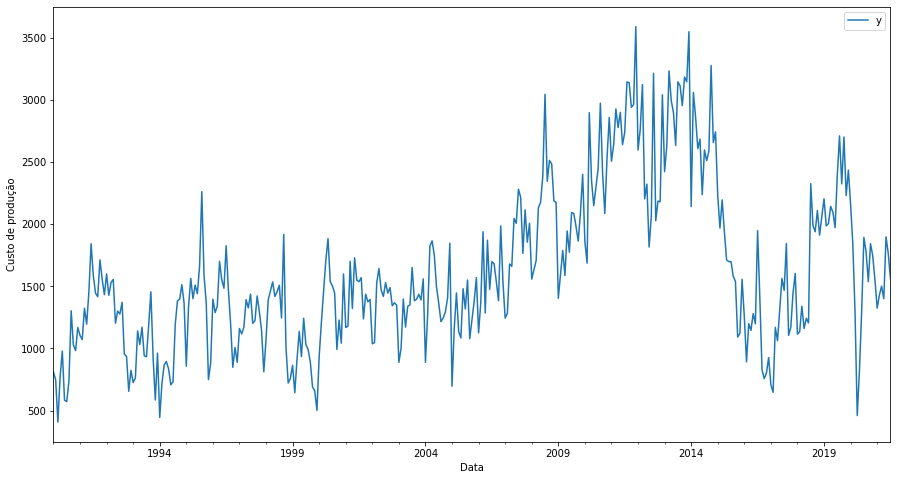

In [ ]:
ax = df.plot(figsize=(15,8))
ax.set_ylabel('Custo de produção')
ax.set_xlabel('Data')

plt.show()

In [ ]:
df_mensal = df.resample('m').sum()

# 4 . Previsão usando Prophet

In [ ]:
## Reset index
df_mensal.reset_index(inplace = True)

**Divisão do conjunto de Treino e teste**

In [ ]:
train_set = df_mensal.iloc[:-12]
test_set = df_mensal.iloc[-12:]

**Criação do modelo**

In [ ]:
model_mensal = Prophet()

In [ ]:
model_mensal.fit(train_set)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
y_pred = model_mensal.predict(test_set)

In [ ]:
y_pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-08-31,1627.562839,1244.066636,2388.928526,1627.562839,1627.562839,204.337923,204.337923,204.337923,204.337923,204.337923,204.337923,0.0,0.0,0.0,1831.900762
1,2020-09-30,1620.672676,992.895081,2153.291383,1620.672676,1620.672676,-41.382181,-41.382181,-41.382181,-41.382181,-41.382181,-41.382181,0.0,0.0,0.0,1579.290495
2,2020-10-31,1613.552841,951.786662,2148.868049,1613.552841,1613.552841,-60.219693,-60.219693,-60.219693,-60.219693,-60.219693,-60.219693,0.0,0.0,0.0,1553.333148
3,2020-11-30,1606.662678,927.688717,2079.426141,1606.487835,1606.796496,-78.292296,-78.292296,-78.292296,-78.292296,-78.292296,-78.292296,0.0,0.0,0.0,1528.370383
4,2020-12-31,1599.542843,1137.396646,2290.803871,1599.009188,1600.026040,112.890557,112.890557,112.890557,112.890557,112.890557,112.890557,0.0,0.0,0.0,1712.433401
5,2021-01-31,1592.423009,650.015672,1805.140845,1591.430768,1593.370905,-352.166797,-352.166797,-352.166797,-352.166797,-352.166797,-352.166797,0.0,0.0,0.0,1240.256212
6,2021-02-28,1585.992190,836.313772,2000.889535,1584.534211,1587.567294,-176.088035,-176.088035,-176.088035,-176.088035,-176.088035,-176.088035,0.0,0.0,0.0,1409.904155
7,2021-03-31,1578.872355,1090.009654,2170.070310,1576.838880,1581.259198,55.394557,55.394557,55.394557,55.394557,55.394557,55.394557,0.0,0.0,0.0,1634.266912
8,2021-04-30,1571.982192,872.550610,2056.567169,1569.185065,1575.038365,-65.130424,-65.130424,-65.130424,-65.130424,-65.130424,-65.130424,0.0,0.0,0.0,1506.851768
9,2021-05-31,1564.862357,953.261436,2159.362055,1561.179133,1568.679562,1.512307,1.512307,1.512307,1.512307,1.512307,1.512307,0.0,0.0,0.0,1566.374664


Prophet desenvolve um grande DataFrame com muitas colunas interessantes, e entre elas, essas possuem um maior relevância.

*   **ds:** dataFrame do valor previsto

*   **yhat**: o valor previsto da nossa métrica (em Estatística, yhat é uma notação tradicionalmente usada para representar os valores previstos de um valor y)

*   **yhat_lower:** o limite inferior das nossas previsões

*   **yhat_upper:** o limite superior das nossas previsões







**Gráfico de previsão**

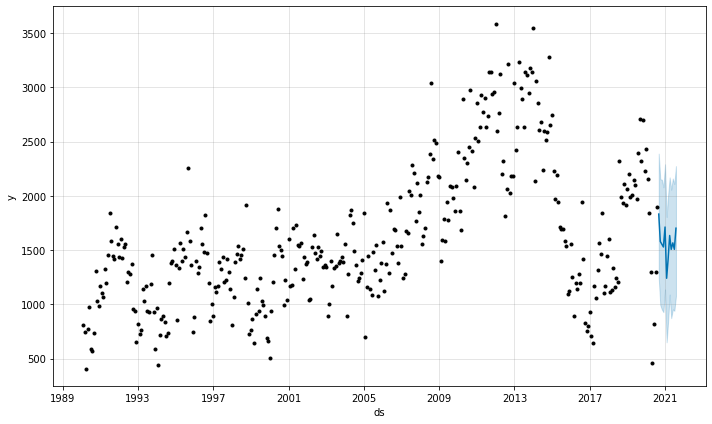

In [ ]:
model_mensal.plot(y_pred, uncertainty=True);

**Vamos avaliar a perfomance do modelo utilizando duas métricas:**



*   **Raiz quadrada do erro quadrático médio (RMSE)** 

*   **Erro médio absoluto (MAE)**

A **RMSE** Mede a precisão geral do modelo, ou seja, é a medida que calcula "a raiz quadrática média" dos erros entre valores observados (reais) e predições (hipóteses). É uma base para a comparação com outros modelos (inclusive modelos ajustados usando técnicas de aprendizado de máquina). 


O **MAE** calcula o "erro absoluto médio" dos erros entre valores observados (reais) e predições (hipóteses).



In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('MAE:{}'.format(metrics.mean_absolute_error(test_set['y'].values, y_pred['yhat'].values)))
print('RMSE:{}'.format(metrics.mean_squared_error(test_set['y'].values, y_pred['yhat'].values, squared=False)))

MAE:152.93703134274526
RMSE:180.96727311990597


Observa-se que os valores encontrados pelas métricas não foram bons. É preciso ajustar os hiperparâmetros do modelo.

Poderiamos analisar outras métricas, tais como:


*   **R ao quadrado -** coeficiente de determinação (em econometria pode ser interpretado como uma porcentagem da variância explicada pelo modelo)


*   **Erro quadrático médio (MSE) -**  mais comumente usado, dá uma penalidade maior para grandes erros e vice-versa.

*   **Erro logarítimico médio quadrático (RMSLE) -** praticamente o mesmo que MSE, mas inicialmente tomamos o logaritmo da série, como resultado damos atenção a pequenos erros também, geralmente é usado quando os dados têm tendências exponenciais

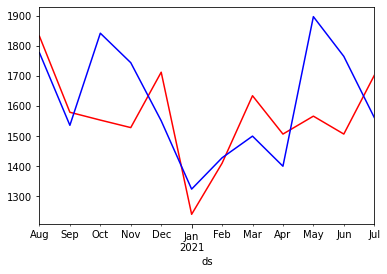

In [ ]:
y_pred.set_index('ds')['yhat'].plot(color='red')
test_set.set_index('ds')['y'].plot(color='blue')

Observando de forma mais clara nesse grafico, a linha vermelha são os valores previstos pelo modelo, já as linha azul são os valores reais, quanto mais próximo essas linhas estiverm, melhor é a perfomace do modelo.

**Decomposição de componentes**

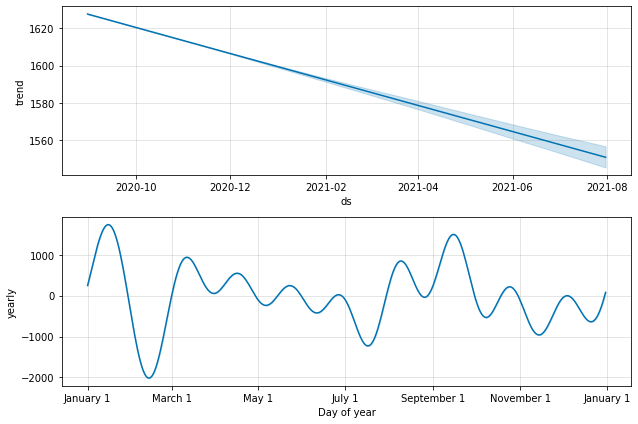

In [ ]:
components_mensal = model_mensal.plot_components(y_pred)
components_mensal;

Vemos uma tedência decrescente e uma significativa variação anual no segundo gráfico


**Validação Cruzada**

In [ ]:
df_cv = cross_validation(model_mensal, horizon = '365 days', initial= ' 365 days')

INFO:fbprophet:Making 58 forecasts with cutoffs between 1991-02-06 12:00:00 and 2019-08-01 00:00:00


  0%|          | 0/58 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 9.
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


In [ ]:
regression_report = performance_metrics(df_cv)

In [ ]:
regression_report

,horizon,mse,rmse,mae,mape,mdape,coverage
0,54 days 00:00:00,358149.682979,598.456083,412.280169,0.313422,0.172092,0.599034
1,54 days 12:00:00,342113.411530,584.904617,397.739049,0.299334,0.165408,0.630435
2,55 days 00:00:00,341233.259754,584.151744,398.014682,0.296626,0.166692,0.641304
3,55 days 12:00:00,332364.829075,576.510910,390.578796,0.285573,0.165408,0.644928
4,56 days 00:00:00,311780.527065,558.373107,373.573135,0.278038,0.156041,0.652174
...,...,...,...,...,...,...,...
167,363 days 00:00:00,495332.007248,703.798272,533.744308,0.378967,0.250423,0.539855
168,363 days 12:00:00,492402.716298,701.714127,529.246876,0.376180,0.250423,0.528986
169,364 days 00:00:00,529973.752849,727.992962,556.514861,0.389551,0.257389,0.503623
170,364 days 12:00:00,529975.036152,727.993843,551.034904,0.393468,0.257389,0.503623


In [ ]:
regression_report['rmse'].mean()

650.7929951652442

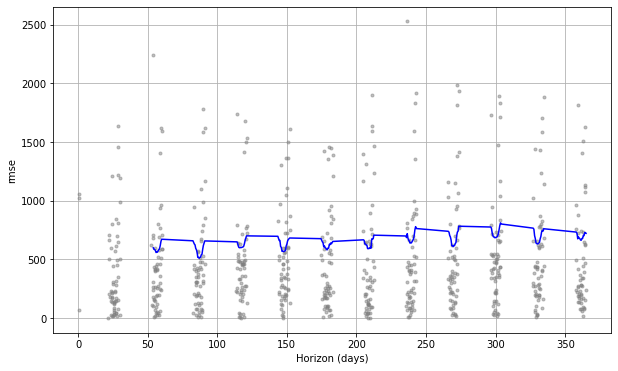

In [ ]:
fig = plot_cross_validation_metric(df_cv, metric='rmse')